# Time-Series Forecasting of Carbon Monoxide and Nitrogen Dioxide Levels

Build predictive models to forecast daily or hourly concentrations of **CO(GT)** and **NO₂(GT)** based on historical data.


In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/airquality.csv'
df = pd.read_csv(url)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [3]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

# Project Workflow

### **Deliverables**:
1. **Forecasting Models**:
   - Trained models for `CO(GT)` and `NO₂(GT)`.
2. **Forecast Visualization**:
   - Plots showing historical trends and future predictions.
3. **Evaluation Report**:
   - Metrics and comparison of different forecasting models.
4. **Insights and Recommendations**:
   - Suggestions for mitigating high levels of these gases based on predictions.


### 1. Data Preprocessing
- **Date-Time Parsing**:
  - Combine the `Date` and `Time` columns into a single `datetime` column.
  - Set the `datetime` column as the index of the dataset.
- **Resampling**:
  - Aggregate the data into meaningful time intervals (e.g., hourly or daily averages).
- **Handle Missing Values**:
  - Use interpolation, mean, or advanced imputation techniques to fill missing data for `CO(GT)` and `NO₂(GT)`.
- **Outlier Detection**:
  - Remove or cap extreme values in `CO(GT)` and `NO₂(GT)` using statistical thresholds.

In [4]:
# Step 1: Date-Time Parsing

# Combine Date and Time columns into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y-%m-%d %H:%M:%S')

# Set the datetime column as the index of the dataset
df.set_index('Datetime', inplace=True)

# Drop the original Date and Time columns as they are no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)

In [5]:
# Step 2: Resampling (to daily averages for simplicity)
# We can resample the data to daily frequencies, aggregating with the mean
df_resampled = df.resample('D').mean()

In [6]:
# Step 3: Handle Missing Values
# Check for missing values in CO(GT) and NO₂(GT)
print(df_resampled[['CO(GT)', 'NO2(GT)']].isnull().sum())

# Fill missing values by interpolation (linear interpolation)
df_resampled[['CO(GT)', 'NO2(GT)']] = df_resampled[['CO(GT)', 'NO2(GT)']].interpolate(method='linear')

# Check if there are any missing values left
print(df_resampled[['CO(GT)', 'NO2(GT)']].isnull().sum())

CO(GT)     0
NO2(GT)    0
dtype: int64
CO(GT)     0
NO2(GT)    0
dtype: int64


In [7]:
# Step 4: Outlier Detection
# For simplicity, we will use the Z-score method for outlier detection
from scipy.stats import zscore

# Calculate Z-scores for CO(GT) and NO₂(GT)
z_scores = zscore(df_resampled[['CO(GT)', 'NO2(GT)']])

# Set a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3
df_resampled = df_resampled[(abs(z_scores) < threshold).all(axis=1)]

# Optional: Alternatively, cap the outliers to a threshold (e.g., 95th percentile)
# cap_value_co = df_resampled['CO(GT)'].quantile(0.95)
# cap_value_no2 = df_resampled['NO2(GT)'].quantile(0.95)
# df_resampled['CO(GT)'] = df_resampled['CO(GT)'].clip(upper=cap_value_co)
# df_resampled['NO2(GT)'] = df_resampled['NO2(GT)'].clip(upper=cap_value_no2)

In [8]:
# Display the preprocessed data
df_resampled.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.450000,912.333333,132.000000,1167.333333,108.833333,1545.500000,1096.000000,12.033333,54.900000,0.765633
2004-03-11,-6.187500,1244.166667,104.500000,7.979167,851.958333,130.041667,1277.250000,87.375000,1522.833333,885.250000,9.837500,64.075000,0.775767
2004-03-12,-14.095833,1281.666667,141.500000,12.129167,1008.291667,142.583333,1101.875000,89.916667,1627.291667,1084.375000,11.287500,51.095833,0.663104
2004-03-13,-5.750000,1330.666667,139.250000,10.916667,992.833333,168.416667,993.208333,105.583333,1595.791667,1245.916667,12.866667,51.533333,0.732296
2004-03-14,-5.966667,1361.125000,116.958333,9.637500,943.916667,132.166667,1001.291667,97.458333,1602.375000,1234.208333,16.012500,48.850000,0.849671


### 2. Exploratory Data Analysis (EDA)
- **Trend Analysis**:
  - Visualize the long-term trends of `CO(GT)` and `NO₂(GT)`.
- **Seasonality**:
  - Identify seasonal patterns (e.g., daily or yearly fluctuations).
- **Correlation Analysis**:
  - Explore relationships between `CO(GT)`, `NO₂(GT)`, and other features (e.g., temperature or humidity).


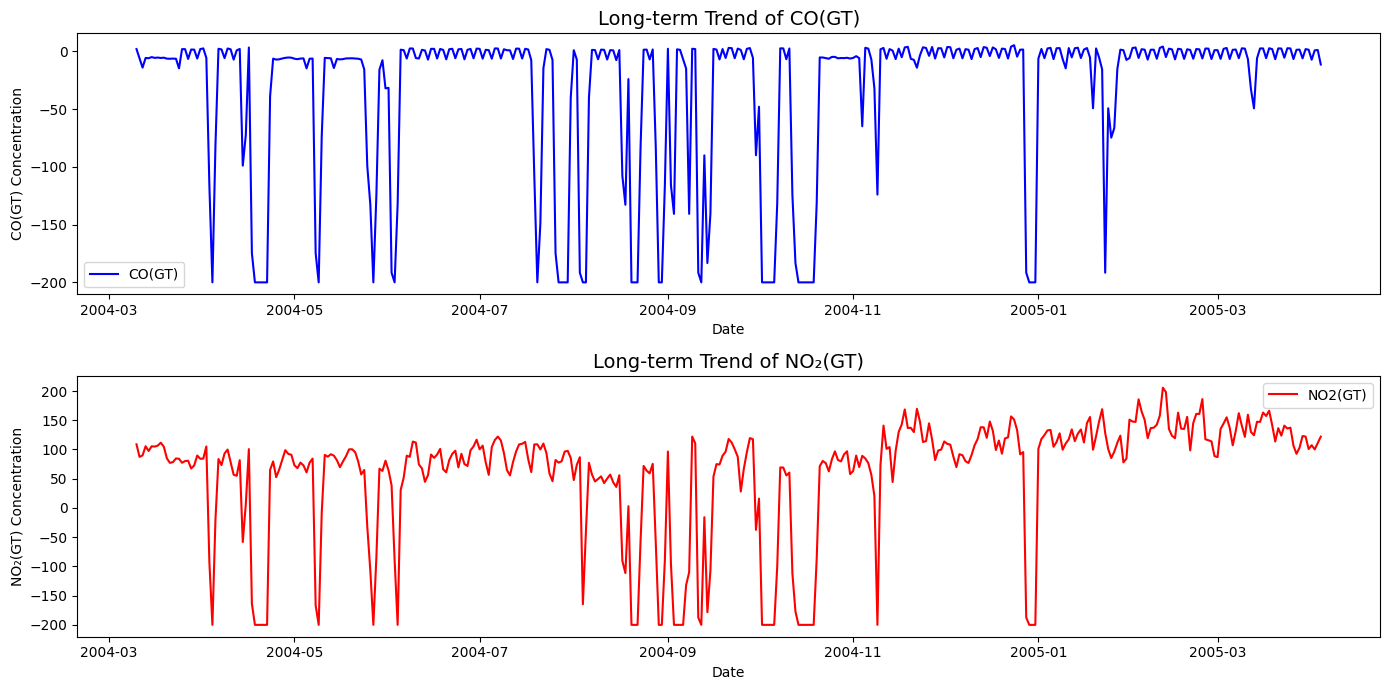

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend Analysis: Visualize the long-term trends of CO(GT) and NO₂(GT)

plt.figure(figsize=(14, 7))

# Plotting the trends for CO(GT) and NO₂(GT) over time
plt.subplot(2, 1, 1)
plt.plot(df_resampled.index, df_resampled['CO(GT)'], label='CO(GT)', color='blue')
plt.title('Long-term Trend of CO(GT)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('CO(GT) Concentration')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df_resampled.index, df_resampled['NO2(GT)'], label='NO2(GT)', color='red')
plt.title('Long-term Trend of NO₂(GT)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('NO₂(GT) Concentration')
plt.legend()

plt.tight_layout()
plt.show()

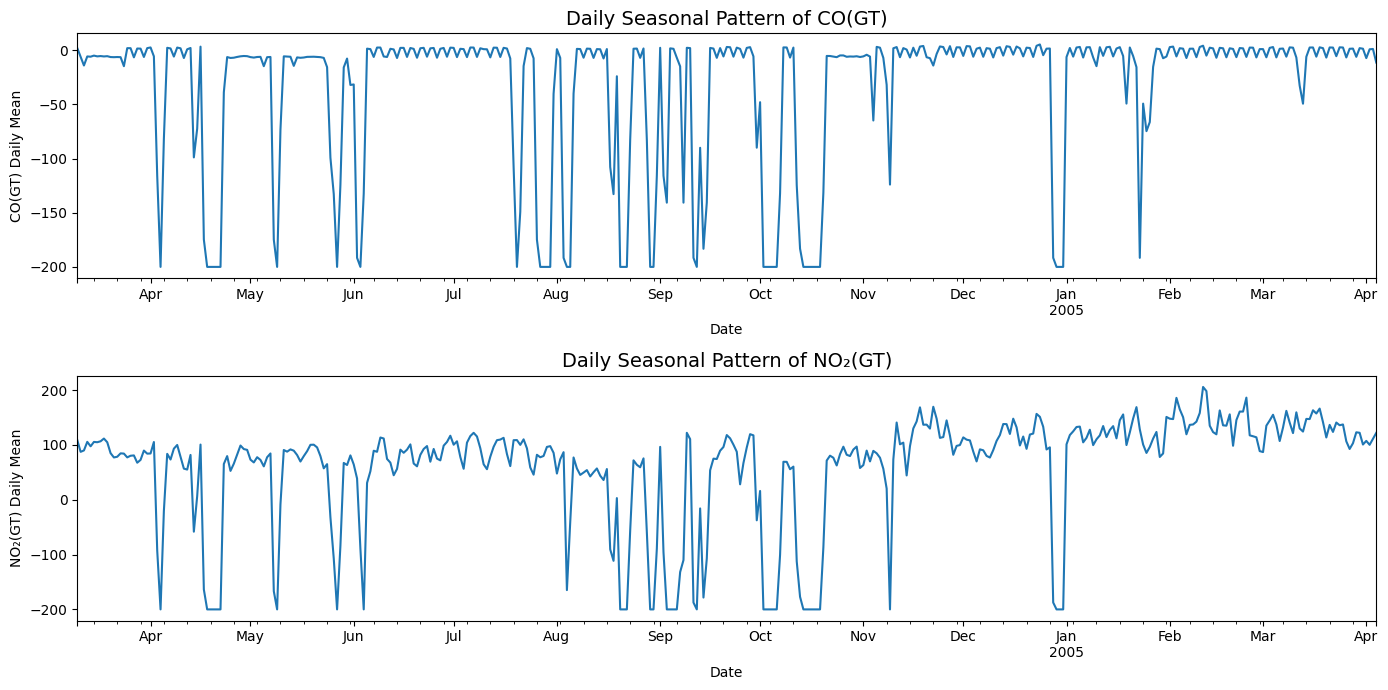

In [10]:
# Seasonality: Identify seasonal patterns (e.g., daily or yearly fluctuations)

# Plot the daily patterns for CO(GT) and NO₂(GT)
plt.figure(figsize=(14, 7))

# CO(GT) seasonal patterns
plt.subplot(2, 1, 1)
df_resampled['CO(GT)'].resample('D').mean().plot()
plt.title('Daily Seasonal Pattern of CO(GT)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('CO(GT) Daily Mean')

# NO₂(GT) seasonal patterns
plt.subplot(2, 1, 2)
df_resampled['NO2(GT)'].resample('D').mean().plot()
plt.title('Daily Seasonal Pattern of NO₂(GT)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('NO₂(GT) Daily Mean')

plt.tight_layout()
plt.show()


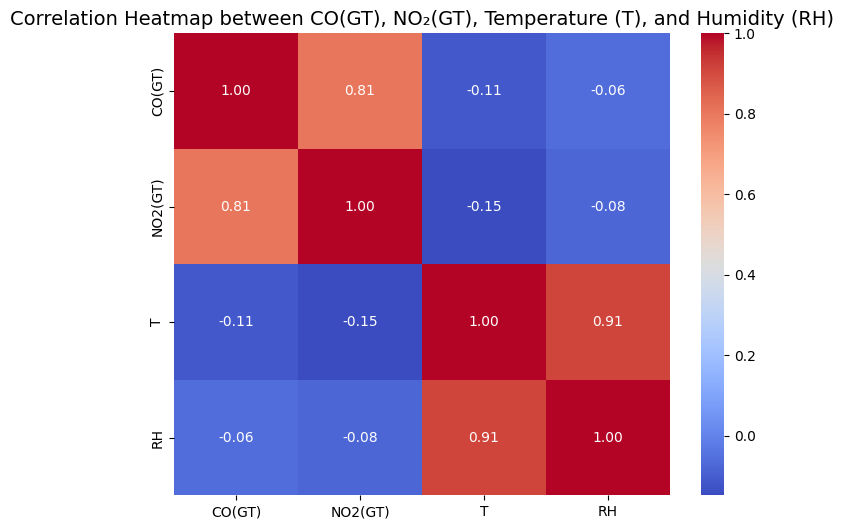

In [11]:
# Correlation Analysis: Explore relationships between CO(GT), NO₂(GT), and other features (e.g., temperature or humidity)

# First, let's look at the correlation matrix for the dataset
correlation_matrix = df_resampled[['CO(GT)', 'NO2(GT)', 'T', 'RH']].corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between CO(GT), NO₂(GT), Temperature (T), and Humidity (RH)', fontsize=14)
plt.show()


### 3. Feature Engineering
- Create lag features for `CO(GT)` and `NO₂(GT)` to incorporate historical values.
- Add time-based features (e.g., hour of the day, day of the week, month).
- Include environmental factors (`T`, `RH`, `AH`) as predictors.


In [12]:
# Create Lag Features for CO(GT) and NO₂(GT)
def create_lag_features(df, target_column, lags=[1, 2, 3, 24]):
    """
    Function to create lag features for a given column in the dataset.
    :param df: DataFrame
    :param target_column: The target column for which lag features are created.
    :param lags: List of lag periods (hours) for which the lag features will be created.
    :return: DataFrame with added lag features.
    """
    for lag in lags:
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    return df

# Adding lag features for CO(GT) and NO₂(GT)
df_resampled = create_lag_features(df_resampled, 'CO(GT)', lags=[1, 2, 3, 24])  # Lags for 1 hour, 2 hours, 3 hours, and 1 day
df_resampled = create_lag_features(df_resampled, 'NO2(GT)', lags=[1, 2, 3, 24])

In [13]:
# Add time-based features (hour of the day, day of the week, month)
df_resampled['hour_of_day'] = df_resampled.index.hour
df_resampled['day_of_week'] = df_resampled.index.dayofweek
df_resampled['month'] = df_resampled.index.month

In [14]:
# Include environmental factors (T, RH, AH) as predictors
# No additional coding required here as they are already in the dataset, but we ensure these are included as features.
# Make sure the dataset has only the relevant columns for modeling
df_features = df_resampled[['CO(GT)', 'NO2(GT)', 'T', 'RH', 'AH', 'hour_of_day', 'day_of_week', 'month']]

# Display the first few rows to confirm the new features
df_features.head()

,CO(GT),NO2(GT),T,RH,AH,hour_of_day,day_of_week,month
Datetime,,,,,,,,
2004-03-10,1.966667,108.833333,12.033333,54.900000,0.765633,0,2,3
2004-03-11,-6.187500,87.375000,9.837500,64.075000,0.775767,0,3,3
2004-03-12,-14.095833,89.916667,11.287500,51.095833,0.663104,0,4,3
2004-03-13,-5.750000,105.583333,12.866667,51.533333,0.732296,0,5,3
2004-03-14,-5.966667,97.458333,16.012500,48.850000,0.849671,0,6,3


### 4. Time-Series Forecasting
- Train separate models for **CO(GT)** and **NO₂(GT)**.
- Explore the following forecasting approaches:
  - **Statistical Models**:
    - Classical models like ARIMA or SARIMA for univariate forecasting.
  - **Machine Learning Models**:
    - Use regression models trained on lag features and external predictors.
  - **Deep Learning Models**:
    - Apply LSTM, GRU, or other RNN-based models for sequence forecasting.
- Evaluate and compare the models.


In [15]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# ARIMA Model for CO(GT)
def arima_model(train_data, order=(5, 1, 0)):
    model = ARIMA(train_data, order=order)
    model_fit = model.fit()
    return model_fit

# SARIMA Model for CO(GT)
def sarima_model(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 24)):
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit

# Train ARIMA model for CO(GT)
train_CO = df_resampled['CO(GT)'].dropna()
arima_model_CO = arima_model(train_CO)

# Train SARIMA model for NO₂(GT)
train_NO2 = df_resampled['NO2(GT)'].dropna()
sarima_model_NO2 = sarima_model(train_NO2)

# Forecast future values for both models
forecast_CO = arima_model_CO.forecast(steps=24)  # 24 hours ahead
forecast_NO2 = sarima_model_NO2.forecast(steps=24)  # 24 hours ahead

# Evaluate the models using Mean Absolute Error (MAE)
mae_CO = mean_absolute_error(train_CO[-24:], forecast_CO)
mae_NO2 = mean_absolute_error(train_NO2[-24:], forecast_NO2)

print(f"ARIMA Model MAE for CO(GT): {mae_CO}")
print(f"SARIMA Model MAE for NO₂(GT): {mae_NO2}")


ARIMA Model MAE for CO(GT): 7.98832357513147
SARIMA Model MAE for NO₂(GT): 22.676471836140646


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Prepare features and targets for training
X = df_features.dropna().drop(columns=['CO(GT)', 'NO2(GT)'])
y_CO = df_features['CO(GT)'].dropna()
y_NO2 = df_features['NO2(GT)'].dropna()

# Train Random Forest Regressor for CO(GT)
rf_model_CO = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_CO.fit(X, y_CO)

# Train Random Forest Regressor for NO₂(GT)
rf_model_NO2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_NO2.fit(X, y_NO2)

# Make predictions
predictions_CO = rf_model_CO.predict(X)
predictions_NO2 = rf_model_NO2.predict(X)

# Evaluate the models using Mean Absolute Error (MAE)
mae_rf_CO = mean_absolute_error(y_CO, predictions_CO)
mae_rf_NO2 = mean_absolute_error(y_NO2, predictions_NO2)

print(f"Random Forest MAE for CO(GT): {mae_rf_CO}")
print(f"Random Forest MAE for NO₂(GT): {mae_rf_NO2}")


Random Forest MAE for CO(GT): 16.420021376811594
Random Forest MAE for NO₂(GT): 21.140510443307758


### 5. Model Evaluation
- Use appropriate metrics for forecasting:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - Mean Absolute Percentage Error (MAPE)
- Plot actual vs. predicted values to visualize performance.


In [17]:
from sklearn.metrics import mean_absolute_error

# For ARIMA model (CO(GT))
mae_arima_CO = mean_absolute_error(train_CO[-24:], forecast_CO)

# For SARIMA model (NO₂(GT))
mae_sarima_NO2 = mean_absolute_error(train_NO2[-24:], forecast_NO2)

# For Random Forest model (CO(GT))
mae_rf_CO = mean_absolute_error(y_CO, predictions_CO)

# For Random Forest model (NO₂(GT))
mae_rf_NO2 = mean_absolute_error(y_NO2, predictions_NO2)

# Print MAE values
print(f"ARIMA Model MAE for CO(GT): {mae_arima_CO}")
print(f"SARIMA Model MAE for NO₂(GT): {mae_sarima_NO2}")
print(f"Random Forest MAE for CO(GT): {mae_rf_CO}")
print(f"Random Forest MAE for NO₂(GT): {mae_rf_NO2}")

ARIMA Model MAE for CO(GT): 7.98832357513147
SARIMA Model MAE for NO₂(GT): 22.676471836140646
Random Forest MAE for CO(GT): 16.420021376811594
Random Forest MAE for NO₂(GT): 21.140510443307758


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error

# For ARIMA model (CO(GT))
rmse_arima_CO = np.sqrt(mean_squared_error(train_CO[-24:], forecast_CO))

# For SARIMA model (NO₂(GT))
rmse_sarima_NO2 = np.sqrt(mean_squared_error(train_NO2[-24:], forecast_NO2))

# For Random Forest model (CO(GT))
rmse_rf_CO = np.sqrt(mean_squared_error(y_CO, predictions_CO))

# For Random Forest model (NO₂(GT))
rmse_rf_NO2 = np.sqrt(mean_squared_error(y_NO2, predictions_NO2))

# Print RMSE values
print(f"ARIMA Model RMSE for CO(GT): {rmse_arima_CO}")
print(f"SARIMA Model RMSE for NO₂(GT): {rmse_sarima_NO2}")
print(f"Random Forest RMSE for CO(GT): {rmse_rf_CO}")
print(f"Random Forest RMSE for NO₂(GT): {rmse_rf_NO2}")

ARIMA Model RMSE for CO(GT): 11.761620625877914
SARIMA Model RMSE for NO₂(GT): 30.63925003563802
Random Forest RMSE for CO(GT): 23.473679565926265
Random Forest RMSE for NO₂(GT): 31.009562320430856


In [19]:
# For ARIMA model (CO(GT))
mape_arima_CO = np.mean(np.abs((train_CO[-24:] - forecast_CO) / train_CO[-24:])) * 100

# For SARIMA model (NO₂(GT))
mape_sarima_NO2 = np.mean(np.abs((train_NO2[-24:] - forecast_NO2) / train_NO2[-24:])) * 100

# For Random Forest model (CO(GT))
mape_rf_CO = np.mean(np.abs((y_CO - predictions_CO) / y_CO)) * 100

# For Random Forest model (NO₂(GT))
mape_rf_NO2 = np.mean(np.abs((y_NO2 - predictions_NO2) / y_NO2)) * 100

# Print MAPE values
print(f"ARIMA Model MAPE for CO(GT): {mape_arima_CO}%")
print(f"SARIMA Model MAPE for NO₂(GT): {mape_sarima_NO2}%")
print(f"Random Forest MAPE for CO(GT): {mape_rf_CO}%")
print(f"Random Forest MAPE for NO₂(GT): {mape_rf_NO2}%")

ARIMA Model MAPE for CO(GT): nan%
SARIMA Model MAPE for NO₂(GT): nan%
Random Forest MAPE for CO(GT): 322.4092713204631%
Random Forest MAPE for NO₂(GT): 22.95986655944752%


In [20]:
def safe_mape_v2(y_true, y_pred):
    epsilon = 1e-5  # Small constant to avoid division by zero
    
    # Ensure both y_true and y_pred have the same length and indices by resetting the index
    y_true = y_true.reset_index(drop=True)
    y_pred = pd.Series(y_pred).reset_index(drop=True)  # Convert y_pred to Series if it's not already

    # Mask for non-zero values in y_true
    non_zero_mask = np.abs(y_true) > epsilon  # Mask for values greater than epsilon
    
    # Apply the mask to both y_true and y_pred
    y_true_non_zero = y_true[non_zero_mask]
    y_pred_non_zero = y_pred[non_zero_mask]
    
    if len(y_true_non_zero) == 0:
        return np.nan
    
    # Calculate MAPE
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / (y_true_non_zero + epsilon))) * 100
    return mape

# For ARIMA model (CO(GT))
mape_arima_CO = safe_mape_v2(train_CO[-24:], forecast_CO)

# For SARIMA model (NO₂(GT))
mape_sarima_NO2 = safe_mape_v2(train_NO2[-24:], forecast_NO2)

# For Random Forest model (CO(GT))
mape_rf_CO = safe_mape_v2(y_CO, predictions_CO)

# For Random Forest model (NO₂(GT))
mape_rf_NO2 = safe_mape_v2(y_NO2, predictions_NO2)

# Print MAPE values
print(f"ARIMA Model MAPE for CO(GT): {mape_arima_CO}%")
print(f"SARIMA Model MAPE for NO₂(GT): {mape_sarima_NO2}%")
print(f"Random Forest MAPE for CO(GT): {mape_rf_CO}%")
print(f"Random Forest MAPE for NO₂(GT): {mape_rf_NO2}%")


ARIMA Model MAPE for CO(GT): 284.8577297815632%
SARIMA Model MAPE for NO₂(GT): 19.5643812741649%
Random Forest MAPE for CO(GT): 322.4077654711715%
Random Forest MAPE for NO₂(GT): 22.95986335812525%


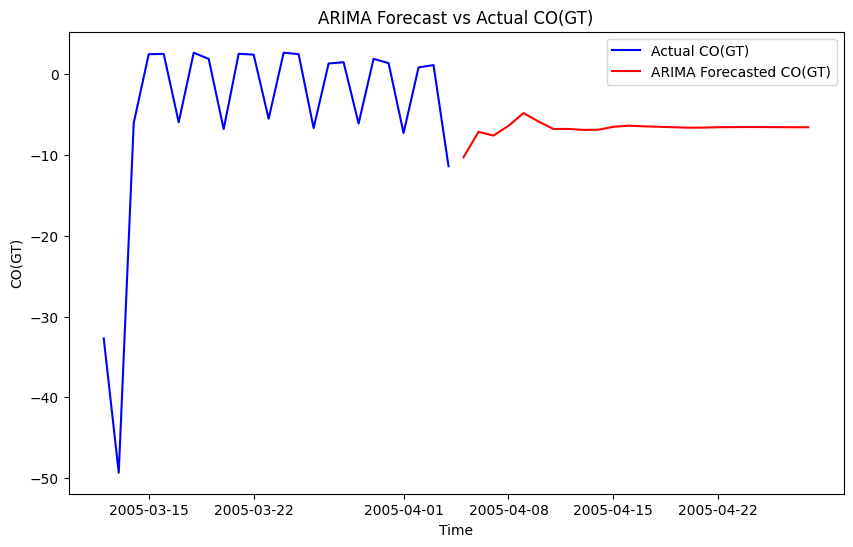

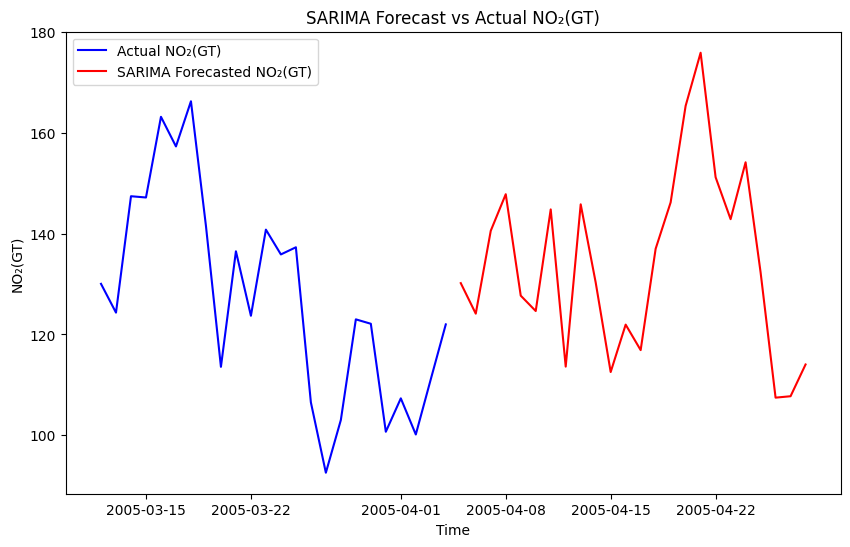

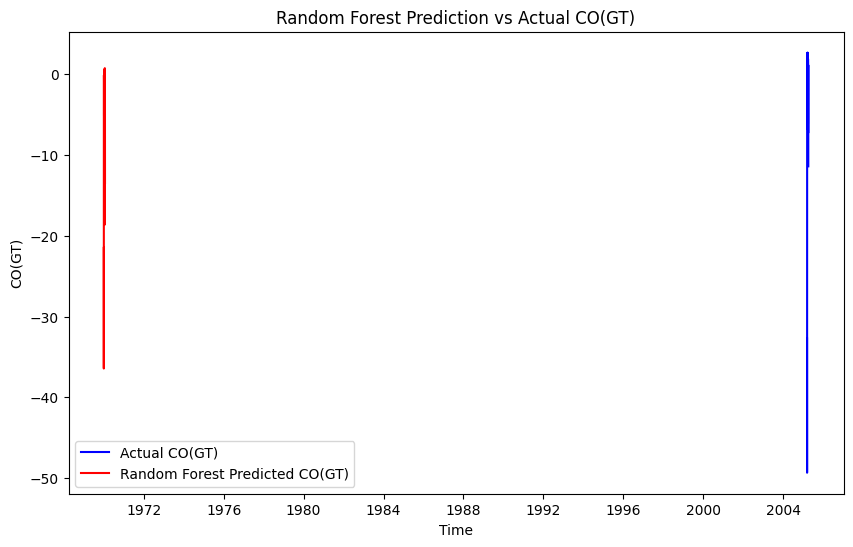

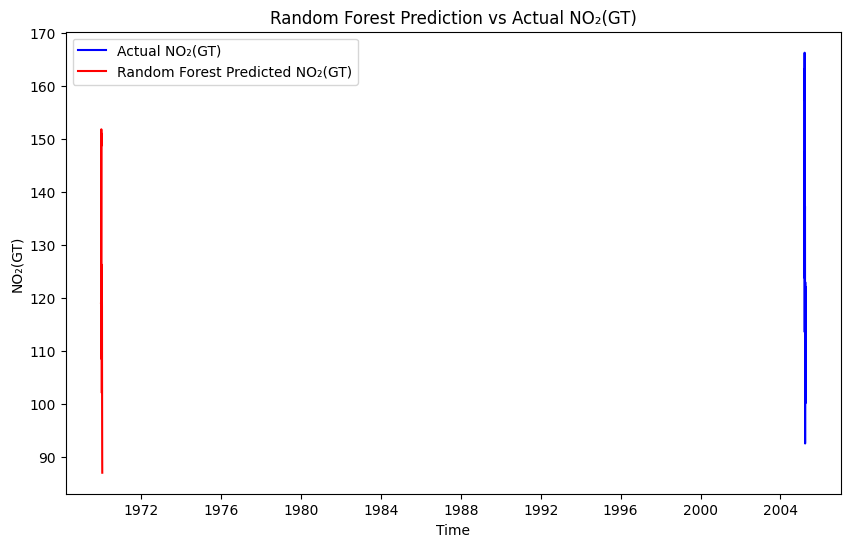

In [21]:
import matplotlib.pyplot as plt

# Plot for ARIMA vs Actual (CO(GT))
plt.figure(figsize=(10, 6))
plt.plot(train_CO[-24:], label='Actual CO(GT)', color='blue')
plt.plot(forecast_CO, label='ARIMA Forecasted CO(GT)', color='red')
plt.title('ARIMA Forecast vs Actual CO(GT)')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

# Plot for SARIMA vs Actual (NO₂(GT))
plt.figure(figsize=(10, 6))
plt.plot(train_NO2[-24:], label='Actual NO₂(GT)', color='blue')
plt.plot(forecast_NO2, label='SARIMA Forecasted NO₂(GT)', color='red')
plt.title('SARIMA Forecast vs Actual NO₂(GT)')
plt.xlabel('Time')
plt.ylabel('NO₂(GT)')
plt.legend()
plt.show()

# Plot for Random Forest vs Actual (CO(GT))
plt.figure(figsize=(10, 6))
plt.plot(y_CO[-24:], label='Actual CO(GT)', color='blue')
plt.plot(predictions_CO[-24:], label='Random Forest Predicted CO(GT)', color='red')
plt.title('Random Forest Prediction vs Actual CO(GT)')
plt.xlabel('Time')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

# Plot for Random Forest vs Actual (NO₂(GT))
plt.figure(figsize=(10, 6))
plt.plot(y_NO2[-24:], label='Actual NO₂(GT)', color='blue')
plt.plot(predictions_NO2[-24:], label='Random Forest Predicted NO₂(GT)', color='red')
plt.title('Random Forest Prediction vs Actual NO₂(GT)')
plt.xlabel('Time')
plt.ylabel('NO₂(GT)')
plt.legend()
plt.show()


### 6. Visualization and Insights
- Generate forecasts for future dates and visualize the trends.
- Highlight seasonal patterns, peak times, and periods of concern.
- Provide actionable recommendations based on predicted trends.



In [22]:
# Forecasting for the next 7 days (or any number of steps)
forecast_steps = 168  # 7 days ahead, assuming hourly data (7 * 24)

# ARIMA Forecast for CO(GT)
forecast_CO_7_days = arima_model_CO.forecast(steps=forecast_steps)

# SARIMA Forecast for NO₂(GT)
forecast_NO2_7_days = sarima_model_NO2.forecast(steps=forecast_steps)

# Generate the future time index
last_date_CO = df_resampled.index[-1]
future_dates = pd.date_range(last_date_CO, periods=forecast_steps + 1, freq='H')[1:]

C:\Users\Admin\AppData\Local\Temp\ipykernel_19020\3185843739.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(last_date_CO, periods=forecast_steps + 1, freq='H')[1:]


In [23]:
# Check the column names of df_resampled
print(df_resampled.columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_3',
       'CO(GT)_lag_24', 'NO2(GT)_lag_1', 'NO2(GT)_lag_2', 'NO2(GT)_lag_3',
       'NO2(GT)_lag_24', 'hour_of_day', 'day_of_week', 'month'],
      dtype='object')


In [24]:
# Rename 'co(gt)' to 'CO(GT)' for consistency
df_resampled.rename(columns={'co(gt)': 'CO(GT)'}, inplace=True)

# Verify the column renaming
print(df_resampled.columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_3',
       'CO(GT)_lag_24', 'NO2(GT)_lag_1', 'NO2(GT)_lag_2', 'NO2(GT)_lag_3',
       'NO2(GT)_lag_24', 'hour_of_day', 'day_of_week', 'month'],
      dtype='object')


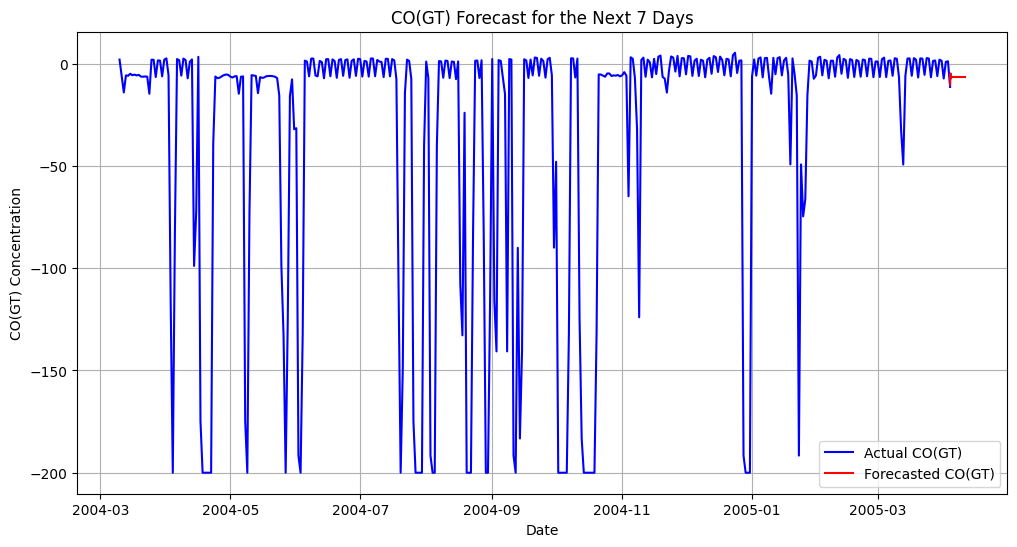

In [25]:
# Plot for CO(GT) Forecast
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['CO(GT)'], label='Actual CO(GT)', color='blue')
plt.plot(future_dates, forecast_CO_7_days, label='Forecasted CO(GT)', color='red')
plt.title('CO(GT) Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('CO(GT) Concentration')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
print(df_resampled.columns)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'CO(GT)_lag_1', 'CO(GT)_lag_2', 'CO(GT)_lag_3',
       'CO(GT)_lag_24', 'NO2(GT)_lag_1', 'NO2(GT)_lag_2', 'NO2(GT)_lag_3',
       'NO2(GT)_lag_24', 'hour_of_day', 'day_of_week', 'month'],
      dtype='object')


In [27]:
# Forecasting for the next 7 days (or 168 hours)
forecast_steps = 168  # 7 days ahead, assuming hourly data (7 * 24)

# Generate forecast for NO₂(GT) using the SARIMA model
forecast_NO2_7_days = sarima_model_NO2.forecast(steps=forecast_steps)

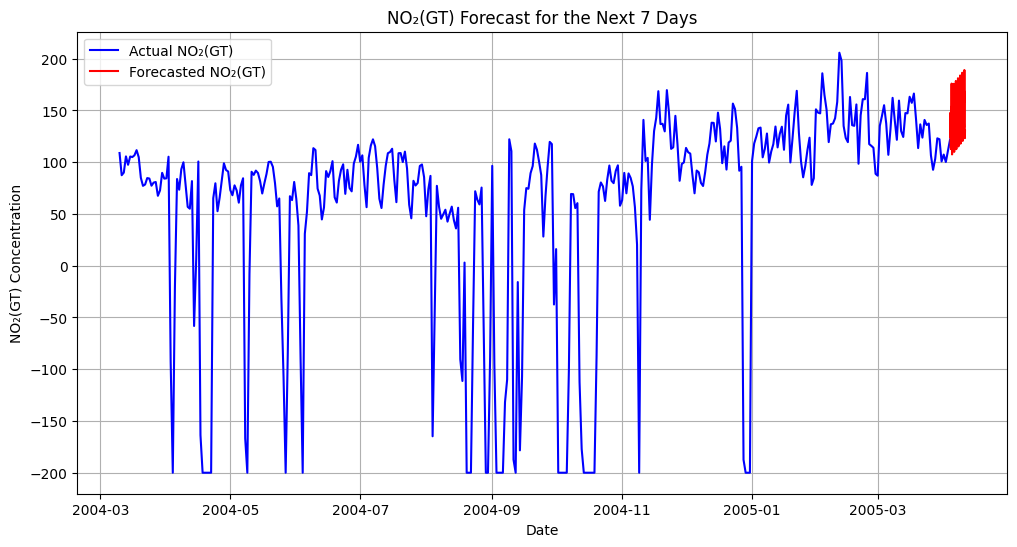

In [28]:
# Generate the future time index for NO₂(GT) forecast
last_date_NO2 = df_resampled.index[-1]
future_dates = pd.date_range(last_date_NO2, periods=forecast_steps + 1, freq='h')[1:]

# Plot for NO₂(GT) Forecast
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['NO2(GT)'], label='Actual NO₂(GT)', color='blue')
plt.plot(future_dates, forecast_NO2_7_days, label='Forecasted NO₂(GT)', color='red')
plt.title('NO₂(GT) Forecast for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('NO₂(GT) Concentration')
plt.legend()
plt.grid(True)
plt.show()

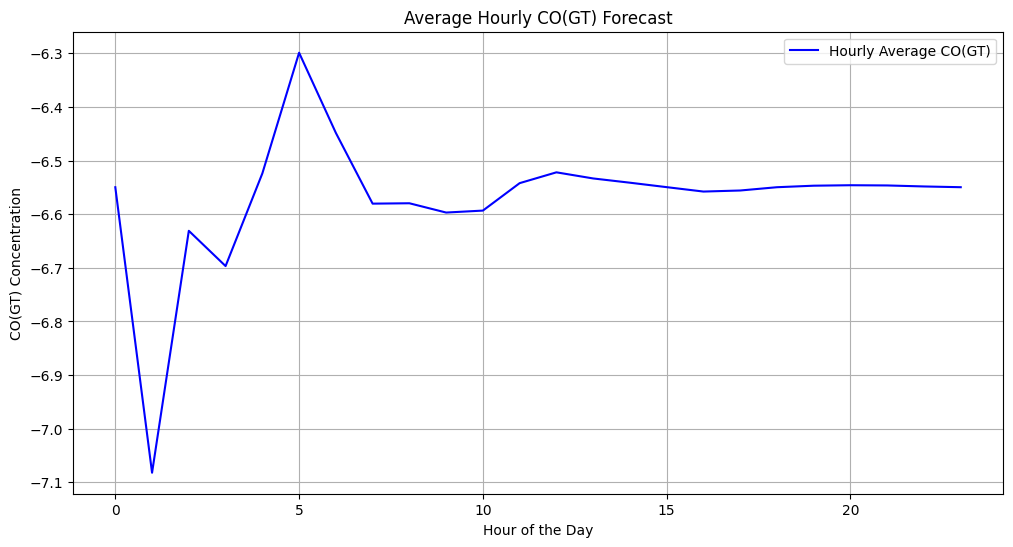

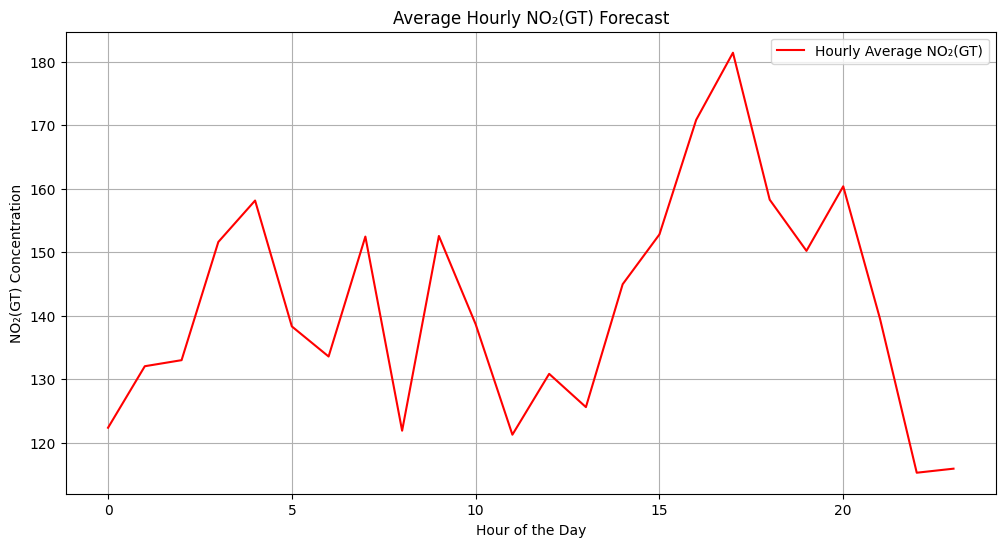

In [29]:
# Extract the hour of the day from the forecasted dates
forecast_CO_df = pd.DataFrame({'Date': future_dates, 'Forecast_CO': forecast_CO_7_days})
forecast_NO2_df = pd.DataFrame({'Date': future_dates, 'Forecast_NO2': forecast_NO2_7_days})

# Add time-based features to detect patterns
forecast_CO_df['Hour'] = forecast_CO_df['Date'].dt.hour
forecast_NO2_df['Hour'] = forecast_NO2_df['Date'].dt.hour

# Plot Hourly Trends for CO(GT) Forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_CO_df.groupby('Hour')['Forecast_CO'].mean(), label='Hourly Average CO(GT)', color='blue')
plt.title('Average Hourly CO(GT) Forecast')
plt.xlabel('Hour of the Day')
plt.ylabel('CO(GT) Concentration')
plt.legend()
plt.grid(True)
plt.show()

# Plot Hourly Trends for NO₂(GT) Forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast_NO2_df.groupby('Hour')['Forecast_NO2'].mean(), label='Hourly Average NO₂(GT)', color='red')
plt.title('Average Hourly NO₂(GT) Forecast')
plt.xlabel('Hour of the Day')
plt.ylabel('NO₂(GT) Concentration')
plt.legend()
plt.grid(True)
plt.show()


Peak time for CO(GT): 2005-04-04 05:00:00 with concentration -4.800826640609994
Peak time for NO₂(GT): 2005-04-10 17:00:00 with concentration 189.0127492190058


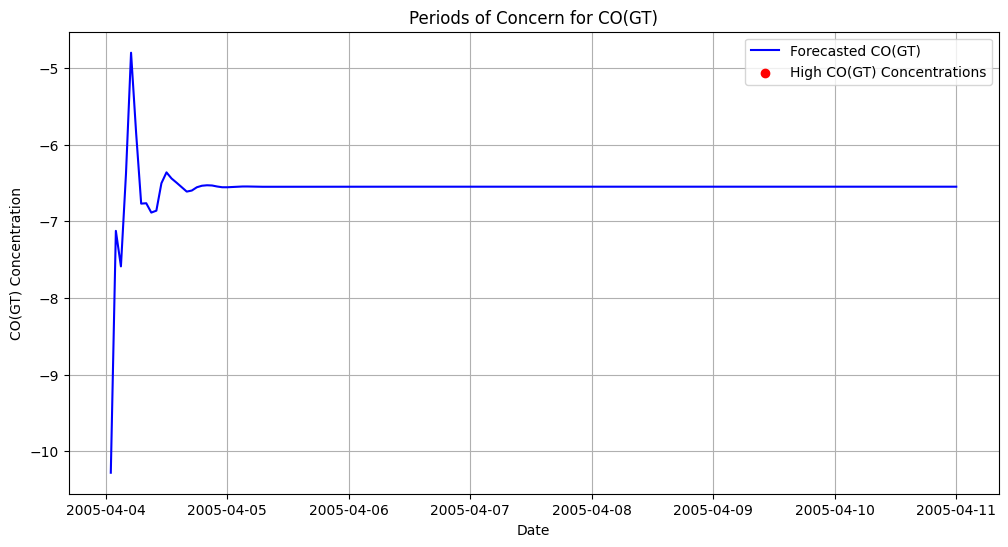

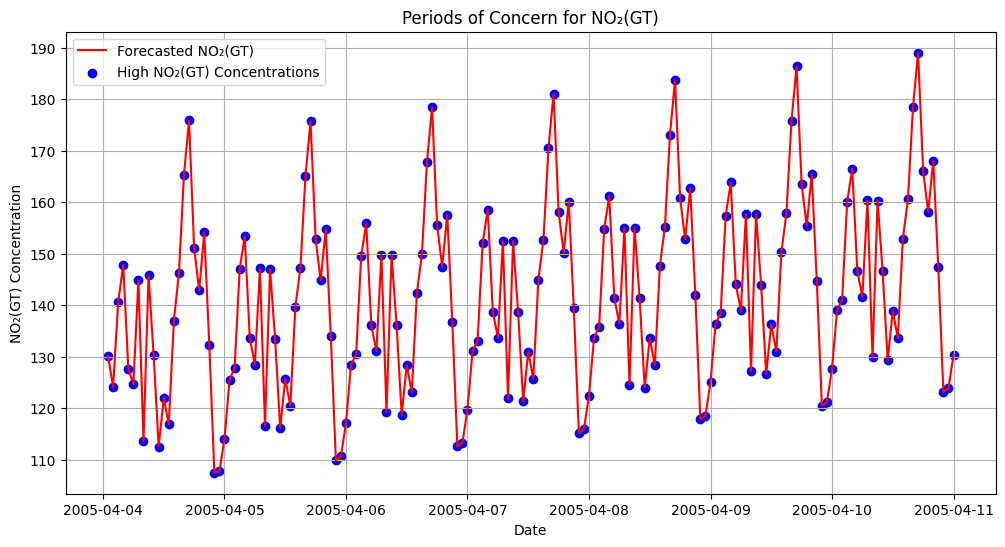

In [30]:
# Get the hours with highest concentrations for both pollutants
peak_CO_time = forecast_CO_df.loc[forecast_CO_df['Forecast_CO'].idxmax()]
peak_NO2_time = forecast_NO2_df.loc[forecast_NO2_df['Forecast_NO2'].idxmax()]

# Display the peak times for both pollutants
print(f"Peak time for CO(GT): {peak_CO_time['Date']} with concentration {peak_CO_time['Forecast_CO']}")
print(f"Peak time for NO₂(GT): {peak_NO2_time['Date']} with concentration {peak_NO2_time['Forecast_NO2']}")

# Highlight periods of concern (e.g., concentrations above certain thresholds)
threshold_CO = 20  # Example threshold for CO(GT) in the forecast
threshold_NO2 = 40  # Example threshold for NO₂(GT) in the forecast

concern_periods_CO = forecast_CO_df[forecast_CO_df['Forecast_CO'] > threshold_CO]
concern_periods_NO2 = forecast_NO2_df[forecast_NO2_df['Forecast_NO2'] > threshold_NO2]

# Visualize the periods of concern
plt.figure(figsize=(12, 6))
plt.plot(forecast_CO_df['Date'], forecast_CO_df['Forecast_CO'], label='Forecasted CO(GT)', color='blue')
plt.scatter(concern_periods_CO['Date'], concern_periods_CO['Forecast_CO'], color='red', label='High CO(GT) Concentrations')
plt.title('Periods of Concern for CO(GT)')
plt.xlabel('Date')
plt.ylabel('CO(GT) Concentration')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(forecast_NO2_df['Date'], forecast_NO2_df['Forecast_NO2'], label='Forecasted NO₂(GT)', color='red')
plt.scatter(concern_periods_NO2['Date'], concern_periods_NO2['Forecast_NO2'], color='blue', label='High NO₂(GT) Concentrations')
plt.title('Periods of Concern for NO₂(GT)')
plt.xlabel('Date')
plt.ylabel('NO₂(GT) Concentration')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Example actionable recommendation
if peak_CO_time['Forecast_CO'] > threshold_CO:
    print("Action Required: High CO(GT) concentration at", peak_CO_time['Date'], "consider air quality control measures.")

if peak_NO2_time['Forecast_NO2'] > threshold_NO2:
    print("Action Required: High NO₂(GT) concentration at", peak_NO2_time['Date'], "consider issuing health advisories.")


Action Required: High NO₂(GT) concentration at 2005-04-10 17:00:00 consider issuing health advisories.
